In [1]:
# Initial imports
import pandas as pd
import numpy as np
from pathlib import Path

%matplotlib inline

In [15]:
#Import data
# set the file path
file_path = Path("Data/LA_CPI_apparel.csv")
file_path_2= Path("Data/LA_CPI_foodaway.csv")
file_path_3= Path("Data/LA_CPI_housing.csv")

# create a Pandas dataframe from a csv file
apparel_df = pd.read_csv(file_path, index_col='Year')
foodaway_df = pd.read_csv(file_path_2, index_col='Year')
housing_df = pd.read_csv(file_path_3, index_col='Year')
housing_df

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Annual,HALF1,HALF2
Year,,,,,,,,,,,,,,,
2012,288.915,289.660,290.936,291.511,292.280,292.729,293.165,293.548,293.979,294.332,294.580,295.019,292.554,291.005,294.104
2013,295.013,295.468,295.811,296.433,297.487,297.973,298.280,298.911,299.477,299.905,300.434,300.730,297.994,296.364,299.623
2014,301.367,302.079,301.907,302.351,302.717,303.586,304.888,305.757,306.388,307.260,308.346,308.746,304.616,302.335,306.898
2015,309.380,310.319,311.712,312.195,313.094,314.217,315.232,316.270,316.513,317.756,318.482,320.054,314.602,311.820,317.385
2016,321.164,322.208,323.991,324.650,326.181,327.527,329.324,330.770,331.974,332.895,334.464,335.713,328.405,324.287,332.523
2017,337.578,338.948,339.298,340.053,340.212,341.127,343.367,345.138,346.393,347.782,349.168,350.535,343.300,339.536,347.064
2018,352.105,353.312,355.088,357.704,358.720,360.256,361.275,362.689,364.472,365.422,366.553,367.809,360.450,356.198,364.703
2019,369.273,371.721,373.243,375.044,375.847,378.219,379.309,380.646,381.810,382.502,383.988,384.936,378.045,373.891,382.199
2020,385.716,386.791,387.550,389.549,390.454,391.436,391.998,392.106,391.975,391.950,390.986,391.023,390.128,388.583,391.673


In [16]:
#Select Annual Data for each dataframe
apparel_df = apparel_df['Annual']
foodaway_df = foodaway_df['Annual']
housing_df = housing_df['Annual']


In [17]:
#Concatenate the dataframes from 2018-2021

combined_df = pd.concat([apparel_df, foodaway_df, housing_df], axis='columns', join='inner')
combined_df


,Annual,Annual,Annual
Year,,,
2012,113.558,220.626,292.554
2013,111.437,222.293,297.994
2014,112.860,228.346,304.616
2015,109.845,234.689,314.602
2016,111.096,243.517,328.405
2017,106.918,252.992,343.300
2018,109.141,262.108,360.450
2019,108.453,275.222,378.045
2020,108.200,289.773,390.128


In [20]:

#Assign the column names
combined_df.columns=["LA Apparel CPI", "LA Food Away from home CPI", "LA Housing CPI"]
print(combined_df)

      LA Apparel CPI  LA Food Away from home CPI  LA Housing CPI
Year                                                            
2012         113.558                     220.626         292.554
2013         111.437                     222.293         297.994
2014         112.860                     228.346         304.616
2015         109.845                     234.689         314.602
2016         111.096                     243.517         328.405
2017         106.918                     252.992         343.300
2018         109.141                     262.108         360.450
2019         108.453                     275.222         378.045
2020         108.200                     289.773         390.128
2021         110.066                     302.717         394.880


In [23]:
#Calculate the year over year percent change in CPI for each
annual_change = combined_df.pct_change()
annual_change


,LA Apparel CPI,LA Food Away from home CPI,LA Housing CPI
Year,,,
2012,NaN,NaN,NaN
2013,-0.018678,0.007556,0.018595
2014,0.012770,0.027230,0.022222
2015,-0.026715,0.027778,0.032782
2016,0.011389,0.037616,0.043874
2017,-0.037607,0.038909,0.045356
2018,0.020792,0.036033,0.049956
2019,-0.006304,0.050033,0.048814
2020,-0.002333,0.052870,0.031962


<AxesSubplot:title={'center':'CPI Year over Year percent change in LA'}, xlabel='Year', ylabel='YoY percent change'>

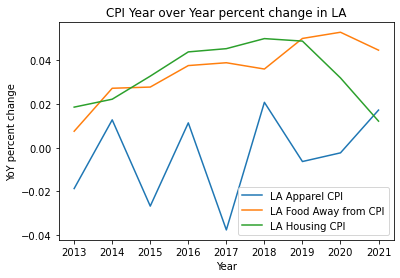

In [71]:
annual_change.plot(title="CPI Year over Year percent change in LA", ylabel= "YoY percent change")

<AxesSubplot:xlabel='Year'>

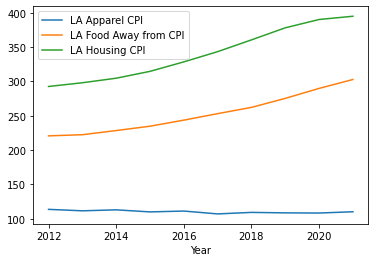

In [72]:
combined_df.plot()

In [6]:
# Get stock data for comparisons with CPI
#import api libraries and dependencies
import alpaca_trade_api as tradeapi
from alpaca_trade_api.rest import REST, TimeFrame
import os
# Load .env environment variables
from dotenv import load_dotenv
load_dotenv()

True

In [7]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2"
)
type(alpaca_api_key)

str

In [8]:
#Format current date as ISO format
start = pd.Timestamp("2012-01-01", tz="America/New_York").isoformat()
end = pd.Timestamp("2021-12-31", tz="America/New_York").isoformat()
timeframe="1Day"

In [9]:
#Fetch stock data for each industry of interest
real_estate = ["TSCO","DHI","LOW","LGIH"]
apparel = ["NKE", "UA","GPS", "LULU", "JWN"]
food_away = ["MCD","YUM", "DRI", "QSR"]

def alpacas_api(symbols,timeframe, start,end):
    dataframe = alpaca.get_bars(symbols, timeframe=timeframe, start=start, end=end).df
    new_df = dataframe[['open','close','trade_count', 'symbol']]

    return new_df

Real_Estate_stocks = alpacas_api(real_estate, timeframe,start,end)
Apparel_stocks = alpacas_api(apparel, timeframe,start,end)
Food_stocks = alpacas_api(food_away, timeframe,start,end)

In [11]:
# Create pivot tables for closing prices for each stock df
Real_Estate_close = Real_Estate_stocks.pivot_table(values="close", index="timestamp",columns="symbol")
Apparel_close = Apparel_stocks.pivot_table(values="close", index="timestamp",columns="symbol")
Food_close = Food_stocks.pivot_table(values="close", index="timestamp",columns="symbol")
Food_close

symbol,DRI,MCD,QSR,YUM
timestamp,,,,
2015-12-01 05:00:00+00:00,56.72,114.45,36.57,74.48
2015-12-02 05:00:00+00:00,56.30,113.72,36.48,74.95
2015-12-03 05:00:00+00:00,55.20,113.39,35.88,73.13
2015-12-04 05:00:00+00:00,57.43,116.20,36.01,76.14
2015-12-07 05:00:00+00:00,58.92,116.42,35.48,76.41
...,...,...,...,...
2021-12-27 05:00:00+00:00,150.23,268.24,60.08,138.01
2021-12-28 05:00:00+00:00,149.37,267.88,60.21,137.98
2021-12-29 05:00:00+00:00,149.02,268.49,60.39,138.66


In [32]:
#Calculate annual percentage change for each stock dataframe
# use resample to get annual data instead of daily
Real_Estate_stocks = Real_Estate_stocks.resample("Y").mean()
Real_estate_stock_annual = Real_Estate_stocks["close"].pct_change()
Real_estate_stock_annual.index = Real_estate_stock_annual.index.year
Real_estate_stock_annual

Apparel_stocks= Apparel_stocks.resample("Y").mean()
Apparel_stocks_annual= Apparel_stocks["close"].pct_change()
Apparel_stocks_annual.index = Apparel_stocks_annual.index.year

Food_stocks = Food_stocks.resample("Y").mean()
Food_stocks_annual = Food_stocks["close"].pct_change()
Food_stocks_annual.index = Food_stocks_annual.index.year

In [29]:
#Fetch percent change for each CPI measure
apparel_pct_change = annual_change["LA Apparel CPI"]
Food_pct_change = annual_change["LA Food Away from home CPI"]
Housing_pct_change = annual_change[ "LA Housing CPI"]
Housing_pct_change.dropna()


Year
2013    0.018595
2014    0.022222
2015    0.032782
2016    0.043874
2017    0.045356
2018    0.049956
2019    0.048814
2020    0.031962
2021    0.012181
Name: LA Housing CPI, dtype: float64

In [26]:
#Create a function to concat CPI data and stock data
def concat_stocks_cpi(stock, cpi):
    df = pd.concat([stock,cpi], axis=1, join="inner")
    return df 

<AxesSubplot:>

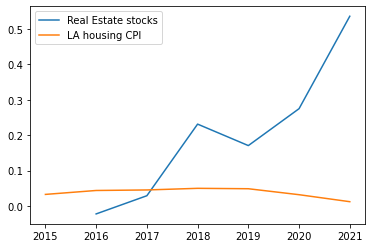

In [30]:
#Combine housing CPI and housing stocks
Housing_combined = concat_stocks_cpi(Real_estate_stock_annual, Housing_pct_change)
Housing_combined.columns = ['Real Estate stocks', "LA housing CPI"]
Housing_combined.plot()

<AxesSubplot:>

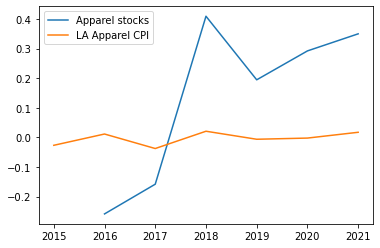

In [34]:
#Combine and plot Apparel CPI and stock data
Food_combined = concat_stocks_cpi(Apparel_stocks_annual, apparel_pct_change)
Food_combined.columns = ['Food stocks', "LA Apparel CPI"]
Food_combined.plot()


<AxesSubplot:>

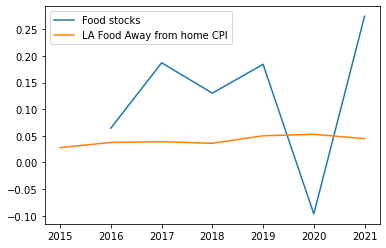

In [36]:
#Combine and plot Food away from home CPI and stock data
Food_combined = concat_stocks_cpi(Food_stocks_annual, Food_pct_change)
Food_combined.columns = ['Food stocks', "LA Food Away from home CPI"]
Food_combined.plot()